In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

data_path = '/Users/haririvera/Desktop/Projects_TDA/project1/spotify-2023.csv'
spotify_data = pd.read_csv(data_path, encoding='ISO-8859-1')

spotify_data


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [30]:

spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

spotify_data.dropna(subset=['streams'], inplace=True)

spotify_data_sorted = spotify_data.sort_values(by='streams', ascending=False)

top_100_songs = spotify_data_sorted.head(100)

top_100_songs = top_100_songs.reset_index(drop=True)

top_100_songs


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1.302184e+09,234,...,141,D,Major,79,82,86,28,0,4,9
96,Heather,Conan Gray,1,2020,3,20,6170,7,1.301800e+09,82,...,92,F,Major,47,25,43,62,0,32,3
97,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
98,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1.284943e+09,137,...,156,B,Minor,32,49,72,0,0,9,4


In [31]:

columns_of_interest = [
    'track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

top_100_songs = top_100_songs[columns_of_interest]

# Display the first few rows to verify
display(top_100_songs.head())



,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Blinding Lights,The Weeknd,43899,69,672,199,"3,421",20,NaN
1,Shape of You,Ed Sheeran,32181,10,33,0,"6,808",7,0
2,Someone You Loved,Lewis Capaldi,17836,53,440,125,"1,800",0,NaN
3,Dance Monkey,Tones and I,24529,0,533,167,"3,595",6,NaN
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,78,372,117,843,4,69


Correlation coefficient: -0.0016455828577665935


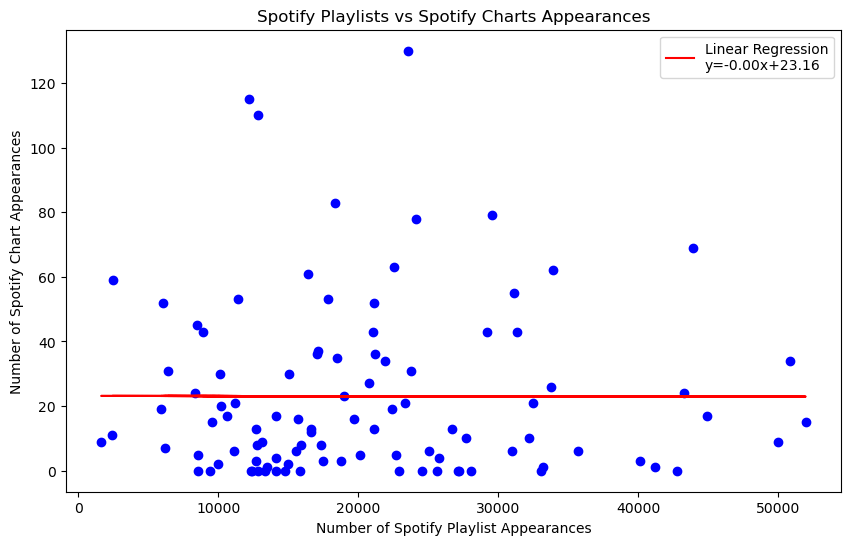

The R-squared value is: 2.707942941775323e-06


In [32]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(top_100_songs['in_spotify_playlists'], top_100_songs['in_spotify_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(top_100_songs['in_spotify_playlists'], top_100_songs['in_spotify_charts'])

# Generate regression values for line of best fit
regression_values = top_100_songs['in_spotify_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_100_songs['in_spotify_playlists'], top_100_songs['in_spotify_charts'], color='blue')

# Plot the regression line
plt.plot(top_100_songs['in_spotify_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Spotify Playlists vs Spotify Charts Appearances')
plt.xlabel('Number of Spotify Playlist Appearances')
plt.ylabel('Number of Spotify Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Optionally print the r-squared value to see how well our model fits the data
print(f"The R-squared value is: {r_value**2}")


Correlation coefficient: 0.581564753413546


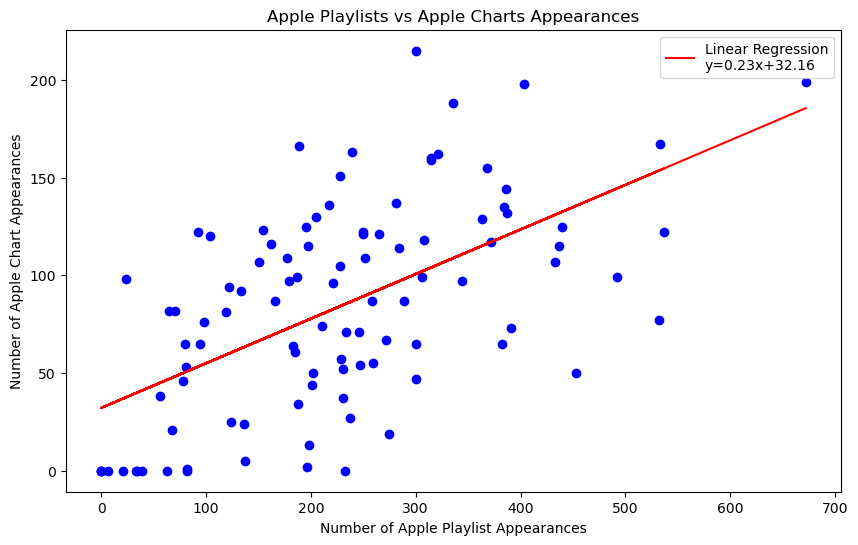

The R-squared value is: 0.3382175624129589


In [33]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(top_100_songs['in_apple_playlists'], top_100_songs['in_apple_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(top_100_songs['in_apple_playlists'], top_100_songs['in_apple_charts'])

# Generate regression values for line of best fit
regression_values = top_100_songs['in_apple_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_100_songs['in_apple_playlists'], top_100_songs['in_apple_charts'], color='blue')

# Plot the regression line
plt.plot(top_100_songs['in_apple_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Apple Playlists vs Apple Charts Appearances')
plt.xlabel('Number of Apple Playlist Appearances')
plt.ylabel('Number of Apple Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Print the r-squared value to show how well the model fits the data
print(f"The R-squared value is: {r_value**2}")

Correlation coefficient: 0.19060566220563763


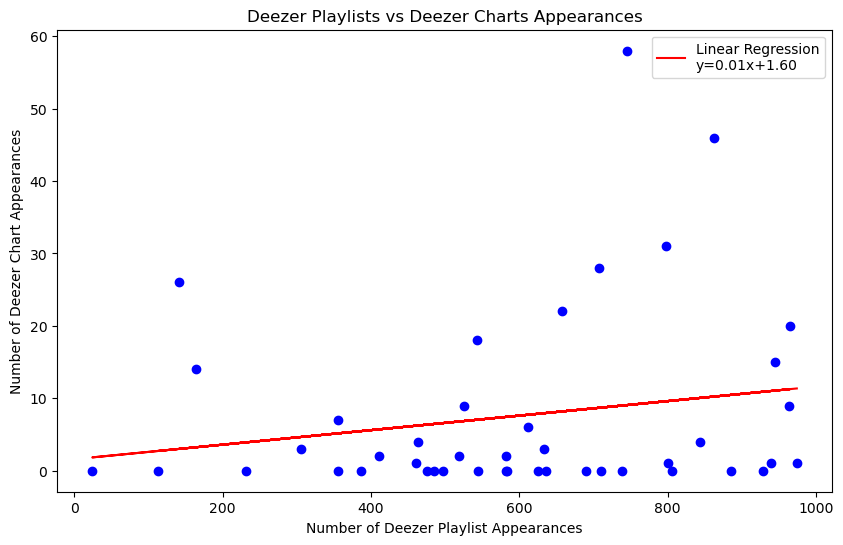

The R-squared value is: 0.036330518464849686


In [38]:
# Drop any rows with NaN or inf values
top_100_songs = top_100_songs.dropna(subset=['in_deezer_playlists', 'in_deezer_charts'])
top_100_songs = top_100_songs.replace([np.inf, -np.inf], np.nan).dropna(subset=['in_deezer_playlists', 'in_deezer_charts'])

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(top_100_songs['in_deezer_playlists'], top_100_songs['in_deezer_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(top_100_songs['in_deezer_playlists'], top_100_songs['in_deezer_charts'])

# Generate regression values for line of best fit
regression_values = top_100_songs['in_deezer_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_100_songs['in_deezer_playlists'], top_100_songs['in_deezer_charts'], color='blue')

# Plot the regression line
plt.plot(top_100_songs['in_deezer_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Deezer Playlists vs Deezer Charts Appearances')
plt.xlabel('Number of Deezer Playlist Appearances')
plt.ylabel('Number of Deezer Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Print the r-squared value to show how well the model fits the data
print(f"The R-squared value is: {r_value**2}")

The correlation coefficient between chart position and Deezer playlists appearances is: 0.19318470349591332


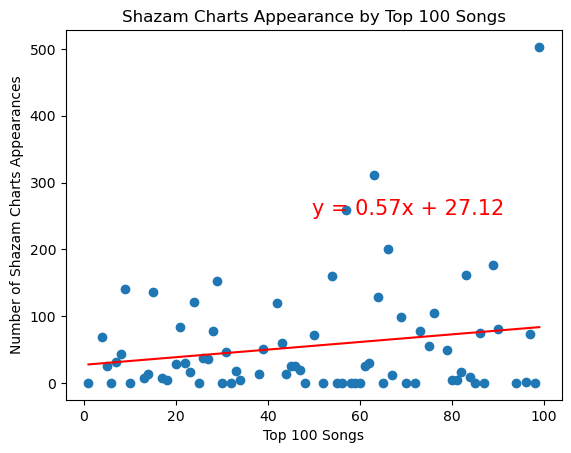

The r-squared for Shazam Charts is: 0.03732032966480393


In [ ]:
top_100_songs['in_shazam_charts'] = pd.to_numeric(top_100_songs['in_shazam_charts'], errors='coerce')
top_100_songs = top_100_songs.dropna(subset=['in_shazam_charts'])

# Calculate correlation coefficient for Deezer playlists
correlation_shazam_charts = st.pearsonr(top_100_songs.index, top_100_songs['in_shazam_charts'])
print(f"The correlation coefficient between chart position and Deezer playlists appearances is: {correlation_shazam_charts[0]}")

# Calculate linear regression model for Deezer playlists
(slope_shazam_charts, intercept_shazam_charts, rvalue_shazam_charts, pvalue_shazam_charts, stderr_shazam_charts) = st.linregress(top_100_songs.index, top_100_songs['in_shazam_charts'])

# Create scatter plot for Deezer playlists
plt.scatter(top_100_songs.index, top_100_songs['in_shazam_charts'])

# Plot regression line for Deezer playlists
regress_values_shazam_charts = top_100_songs.index * slope_shazam_charts + intercept_shazam_charts
plt.plot(top_100_songs.index, regress_values_shazam_charts, "r-")

# Construct the line equation string for Deezer playlists
line_eq_shazam_charts = f"y = {slope_shazam_charts:.2f}x + {intercept_shazam_charts:.2f}"

# Add labels and title for Deezer playlists
plt.xlabel('Top 100 Songs')
plt.ylabel('Number of Shazam Charts Appearances')
plt.title('Shazam Charts Appearance by Top 100 Songs')

# Annotate line equation on the plot for Deezer playlists
plt.annotate(line_eq_shazam_charts, (max(top_100_songs.index)/2, max(top_100_songs['in_shazam_charts'])/2), fontsize=15, color="red")

# Show plot for Deezer playlists
plt.show()

# Print r-squared value for Deezer playlists
print(f"The r-squared for Shazam Charts is: {rvalue_shazam_charts**2}")